# Kaggle team name: vijf5!

# Members:
1. Jesse Coenraad -> JesseCoenraad
2. Jordan van Sintanneland -> JordanvanSint
3. Casper Priem -> CasperPriem
4. Jassar Hasiba -> UrClades

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler


# 1. Exploratieve Data Analyse (EDA)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
# Kijken of er missende data in de traindata zit
msno.matrix(train)

In [ ]:
# Kijken of er missende data in de testdata zit
msno.matrix(test)

In [ ]:
# Booleans omzetten naar 0 en 1

train = train.astype({col: int for col in train.columns if train[col].dtype == 'bool'})
test = test.astype({col: int for col in test.columns if test[col].dtype == 'bool'})

In [ ]:
display(train.head())
display(train.info())
display(train.describe())

In [ ]:
for i in train.columns:
    sns.histplot(x=train[i])
    plt.show()

In [ ]:

plt.figure(figsize=(25, 18))
sns.heatmap(train.corr(), annot=True)

In [ ]:
X = train.drop('stroke', axis = 1)
y = train['stroke']

In [ ]:
sc = StandardScaler()

train = sc.fit_transform(train) 

### 1.1 Uitleg van iedere kolom

0: id: uniek id van het persoon

1: age: leeftijd

3: hypertension: hoge bloeddruk (0 is nee, 1 is ja)

4: heart_disease: hart- en vaatziekten (0 is nee, 1 is ja)

5: avg_glucose_level: gemiddeld glucoselevel gemeten in mmol/L

6: bmi: bmi van de persoon 

7: gender_female: geslacht (True or False)

8: Gender_other: People who identify as something other than male or female

9: Every_married_no: geeft aan wie er niet getrouwd is.

10: Every_married_yes: geeft aan wie er wel getrouwd is.

11: Work_type_Govt_job: geeft aan wie er een baan heeft die te maken heeft met veiligheid van de bevolking.

12: work_type_never_worked: mensen die nooit gewerkt hebben.

13: work_type_private_work: mensen die privé werk doen.

14: work_type_Self_employed: mensen die eigen baas zijn.

15: work_type_children: ?

16: Residence_type_rural: heeft de person een huis in een landelijk gebied. (True or False)

17: Residence_type_urban: heeft de persoon een huis in een stedelijk gebied. (True or False)

18: Smoking_status_formerly smoked: heeft de person in het verleden gerookt.  (True or False)

19: Smoking_status_never smoked: heeft de persoon ooit gerookt.  (True or False)

20: Smoking_status_smokes: Rookt de persoon momenteel actief.  (True or False)

21: Stroke: Heeft de persoon een beroerte gehad. (True or False)


### 1.2 Beschrijf in hoeverre de data voldoet aan de minimale vereisten voor Machine Learning met Scitkit Learn

In [3]:
display(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33550 entries, 0 to 33549
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              33550 non-null  int64  
 1   age                             33550 non-null  float64
 2   hypertension                    33550 non-null  int64  
 3   heart_disease                   33550 non-null  int64  
 4   avg_glucose_level               33550 non-null  float64
 5   bmi                             33550 non-null  float64
 6   gender_Female                   33550 non-null  bool   
 7   gender_Male                     33550 non-null  bool   
 8   gender_Other                    33550 non-null  bool   
 9   ever_married_No                 33550 non-null  bool   
 10  ever_married_Yes                33550 non-null  bool   
 11  work_type_Govt_job              33550 non-null  bool   
 12  work_type_Never_worked          

None

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000
mean,36746.393353,41.815312,0.088137,0.043040,103.587081,28.601216,0.015410
std,20906.519131,22.477423,0.283498,0.202951,42.127396,7.782248,0.123178
min,1.000000,0.080000,0.000000,0.000000,55.010000,10.100000,0.000000
25%,18763.250000,24.000000,0.000000,0.000000,77.460000,23.300000,0.000000
50%,36862.000000,43.000000,0.000000,0.000000,91.320000,27.700000,0.000000
75%,54757.500000,59.000000,0.000000,0.000000,111.437500,32.800000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,281.590000,97.600000,1.000000


EDA: Voldoet aan de eisen, geen missende waarden etc.

### 1.2.1 maak de evenutele aanpassingen

### 1.3 Onderzoek de relaties tussen de onafhankelijke variabelen enerzijds en de afhankelijke variabele anderzijds. Gebruik hierbij passende visualisaties

                                      id       age  hypertension  \
id                              1.000000  0.019925      0.009345   
age                             0.019925  1.000000      0.270207   
hypertension                    0.009345  0.270207      1.000000   
heart_disease                   0.011535  0.243313      0.121086   
avg_glucose_level               0.025441  0.230919      0.156929   
bmi                             0.020731  0.355223      0.156497   
gender_Female                  -0.001009  0.030582     -0.021556   
gender_Male                     0.001054 -0.030408      0.021671   
gender_Other                   -0.001627 -0.006435     -0.004158   
ever_married_No                -0.012487 -0.694193     -0.176087   
ever_married_Yes                0.012487  0.694193      0.176087   
work_type_Govt_job             -0.000790  0.115869      0.020330   
work_type_Never_worked          0.003074 -0.069243     -0.018572   
work_type_Private               0.012355  0.1505

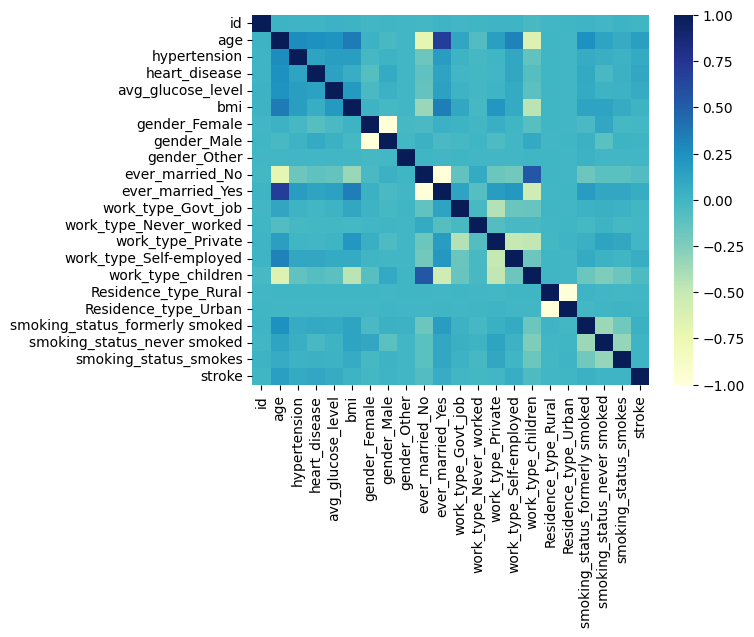

In [4]:
print(data.corr(numeric_only=True))

# Plotting correlation heatmap
dataplot = sns.heatmap(data.corr(numeric_only=True), cmap="YlGnBu", annot=False)

plt.show()

### 1.4 Beschrijf de belangrijkste bevindingen van de EDA

### 1.5 Sommige regels en/of kolommen zijn soms niet relevant voor machine learning. Schoon de data op zodat alleen relevante regels resteren

### 1.6 Beschrijf wat wordt bedoeld met het standaardiseren van de data. Geef aan in welke gevallen dit gewenst is. Beargumenteer of het waarde toevoegt voor deze dataset en voer eventueel standaardisatie uit

# 2. Evaluatie

### 2.1 Geef aan met welke “metrics”, voor deze vorm van machine learning, bepaalt kan worden hoe goed een model presteert. Toon de uitkomsten op deze metrics aan de hand van een zelf te kiezen machine learning algoritm

### 2.2 Leg uit hoe iedere metric wordt berekend. Gebruik hierbij een confusion matrix

### 2.3 In de Kaggle competitie zie je dat er is gekozen voor de f1-score om te beoordelen hoe goed een model presteert. Leg uit waarom f1-score voor dit vraagstuk de beste maatstaf is

# 3. Modelleren en uitleg modellen

Pas cross-validation en hyperparameter tuning toe op ieder model.

Als je de beste hyperparameters voor een model hebt gevonden dan pas je het model met die hyperparameters toe op test.csv. De voorspellingen upload je op Kaggle om te zien hoe goed een model presteert.

De dataset is een “imbalanced dataset”. Leg uit waarom dit zo is. Er zijn meerdere technieken waarmee je voorspellingen voor zo’n dataset kunt verbeteren. Zonder toepassingvan deze technieken zullen je voorspellingen erg slecht zijn. Pas voor alle modellen ensembles minimaal 2 van deze technieken toe en leg uit hoe iedere techniek werk

## 3.1 KNN

#### 3.1.1 Leg uit hoe model werkt. Gebruik daarin onder andere termen “afstand”, “euclidean” en “manhattan

### 3.1.2 Leg uit waarom standaardisatie voor dit model van groot belang

### 3.1.3 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

### 3.1.4 Leg uit hoe regularisatie werkt voor dit model

## 3.2 Logistic Regression

### 3.2.1 Leg uit hoe het model werkt

### 3.2.2 Toon de wiskundig formule voor de loss-functie en ligt deze toe

### 3.2.3 Leg uit wat gradient descent is in deze context. Leg dit uit aan de hand van een eenvoudig rekenvoorbeeld en geef hierbij de relevant wiskundige formules

### 3.2.4 Benoem de vormen van regularisatie die van toepassing zijn op dit model. Leg aan de hand van wiskundige formules uit hoe iedere vorm werkt en wat het effect is van iedere vorm

### 3.2.5 Beschrijf hoe regularisatie zich verhoudt ten opzichte van overfitting

### 3.2.6 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

## 3.3 SVM

### 3.3.1 Beschrijf de werking van dit model. Toon hierbij de relevante wiskundige formules en leg ze uit aan de hand van een rekenvoorbeeld. Gebruik hierbij een klein deel van de dataset. Leg ook uit wat een kernel is en wat de kernel trick is

### 3.3.2 Toon de wiskundig formule voor de loss functie en ligt deze toe

### 3.3.3 Benoem de vormen van regularisatie die van toepassing zijn op dit model. Leg aan de hand van wiskundige formules uit hoe iedere vorm werkt en wat het effect is van iedere vorm

### 3.3.4 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

## 3.4 Decision Tree

### 3.4.1 Beschrijf de werking van dit model

### 3.4.2 Beschrijf de criteria op basis waarvan de splitsingen in de beslisboon kunnen worden gemaakt

### 3.4.3 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

### 3.4.4 Leg uit wat ‘pruning’ is en beschrijf welke vormen hiervan zijn toegepast. Leg de relatie tussen ‘pruning’ en ‘underfitting / overfitting’ uit

## 3.5 Ensembles  (Random Forest, Gradient Boosted Boosted Decistion Trees en XGboost)

### 3.5.1 Beschrijf de werking van de 3 genoemde ensembles. Gebruik daarbij o.a. de termen “bagging (bootstrap aggregation)” en “boosting “. Leg daarbij uit welke ensembles relatief veel trainingstijd nodig hebben en welke weinig tijd. Gebruik daarbij o.a. de termen “sequential” en “parallel"

### 3.5.2 Bepaal bij welke hyperparameters ieder ensemble de beste resultaten geeft op de gekozen metric.

## 3.6 Zelf samengesteld ensemble

Ensemble dient te bestaan uit minimaal drie modellen

### 3.6.1 Leg uit hoe een ensemble werkt en beschrijf welke vorm van “voting” je hebtgekozen en waarom

### 3.6.2 Leg uit waarom je hebt gekozen voor de modellen in je ensemble

### 3.6.3 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

# 4. Conclusie en advies

### 4.1 Geef in een tabel een overzicht van de scores van alle toegepaste modellen en ensembles. Laat daarin van ieder model en ensemble zien hoe het presteerde in je notebook en op Kaggle

### 4.2 Welke model presteert het beste? Waarom? Bij welke parameters?

### 4.3 De prestaties van een model zijn belangrijk. Welke overwegingen spelen nog meer een rol, naast de prestaties van het model, om een juiste keuze voor een model te maken

### 4.4 Welke model adviseer je aan artsen om te gebruiken? Leg uit waarom?